In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Tweets.csv')
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
# Step 4: Check for missing values
print("\n🔹 Missing Values:")
print(df.isnull().sum())



🔹 Missing Values:
textID           0
text             1
selected_text    1
sentiment        0
text_length      1
dtype: int64


In [11]:
# Mean
print("Mean of text_length:", df['text_length'].mean())

# Median
print("Median of text_length:", df['text_length'].median())

# Mode
print("Mode of text_length:", df['text_length'].mode()[0])

# Variance
print("Variance of text_length:", df['text_length'].var())


Mean of text_length: 68.32753538808632
Median of text_length: 64.0
Mode of text_length: 41
Variance of text_length: 1267.7593469422027


In [19]:
#Encode the Target Variable (Sentiment)
df['sentiment_encoded'] = df['sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})
df[['sentiment', 'sentiment_encoded']].head()

,sentiment,sentiment_encoded
0,neutral,0
1,negative,-1
2,negative,-1
3,negative,-1
4,negative,-1


In [18]:
#Perform Correlation Analysis
correlation = df[['text_length', 'word_count', 'char_count', 'sentiment_encoded']].corr()
correlation


,text_length,word_count,char_count,sentiment_encoded
text_length,1.000000,0.961239,0.997209,0.001509
word_count,0.961239,1.000000,0.940960,-0.018130
char_count,0.997209,0.940960,1.000000,0.003277
sentiment_encoded,0.001509,-0.018130,0.003277,1.000000


In [15]:
#Identify Top 3 Most Related Features
corr_with_target = correlation['sentiment_encoded'].sort_values(ascending=False)
print(corr_with_target.head(3))


sentiment_encoded    1.000000
char_count           0.003277
text_length          0.001509
Name: sentiment_encoded, dtype: float64


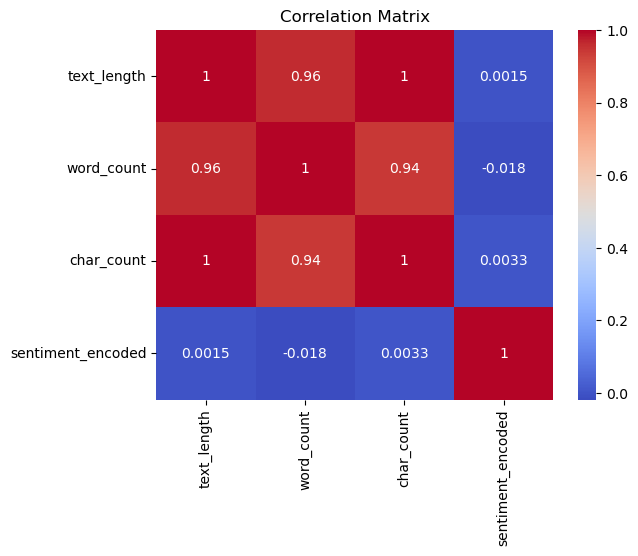

In [16]:
#Visualize Correlation (Heatmap)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
